## Neural Network

- N (N > 2) Layer
- Tanh Activation
- SoftMax Activation(Output)

In [1]:
## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Run some setup code for this notebook.
import random
import numpy as np
import pandas as pd
from mnist import MNIST

import sys
sys.path.append('./..')
from py_model.n_layer_mlp import N_LayerNetwork

%load_ext autoreload
%autoreload 2

In [3]:
def make_dataset(X, y):
    train_X = np.array([])
    train_y = np.array([], dtype=int)

    num_train = 60000
    num_test = 10000

    for i in range(int(num_train/4)):
        train_X = np.append(train_X, X)
        train_y = np.append(train_y, y)

    train_X = train_X.reshape((num_train, 2))

    test_indices = np.random.choice(num_train, num_test, replace=True)
    test_X = train_X[test_indices]
    test_y = train_y[test_indices]

    print(train_X.shape, train_y.shape)
    print(test_X.shape, test_y.shape)

    return train_X, train_y, test_X, test_y

## And
- 0, 0 : 0
- 0, 1 : 0
- 1, 0 : 0
- 1, 1 : 1

In [4]:
and_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
and_y = [0, 0, 0, 1]

train_X, train_y, test_X, test_y = make_dataset(and_X, and_y)

(60000, 2) (60000,)
(10000, 2) (10000,)


In [5]:
print(train_X[:4], train_y[:4])

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]] [0 0 0 1]


In [6]:
layer1 = {'layer': (2, 50), 'act_F': lambda x: np.tanh(x)}
layer2 = {'layer': (50, 100), 'act_F': lambda x: np.tanh(x)}
layer3 = {'layer': (100, 200), 'act_F': lambda x: np.tanh(x)}
layer4 = {'layer': (200, 300), 'act_F': lambda x: np.tanh(x)}
layer5 = {'layer': (300, 2)} 

nn = N_LayerNetwork([layer1, layer2, layer3, layer4, layer5])
nn.train(train_X, train_y, learning_rate=0.05, num_iters=1000, batch_size=30, verbose=True)

Epoch :  1  loss= 0.693035396094
Epoch :  51  loss= 0.613050719246
Epoch :  101  loss= 0.642518907101
Epoch :  151  loss= 0.611790301619
Epoch :  201  loss= 0.470996937163
Epoch :  251  loss= 0.50358618661
Epoch :  301  loss= 0.580292858562
Epoch :  351  loss= 0.58031922238
Epoch :  401  loss= 0.440541764808
Epoch :  451  loss= 0.435683189849
Epoch :  501  loss= 0.580717450801
Epoch :  551  loss= 0.580093725838
Epoch :  601  loss= 0.580487542103
Epoch :  651  loss= 0.473209772361
Epoch :  701  loss= 0.427939970093
Epoch :  751  loss= 0.661375187109
Epoch :  801  loss= 0.616767528023
Epoch :  851  loss= 0.472752779918
Epoch :  901  loss= 0.691097411988
Epoch :  951  loss= 0.617866216161


Accuracy : 74.97%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


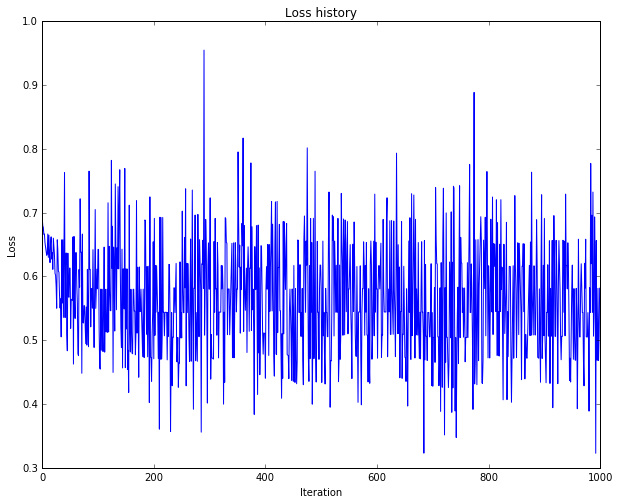

In [7]:
# Test
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

### OR
- 0, 0 : 0
- 0, 1 : 1
- 1, 0 : 1
- 1, 1 : 1

In [8]:
or_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
or_y = [0, 1, 1, 1]

train_X, train_y, test_X, test_y = make_dataset(or_X, or_y)

(60000, 2) (60000,)
(10000, 2) (10000,)


In [9]:
print(train_X[:4], train_y[:4])

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]] [0 1 1 1]


In [10]:
layer1 = {'layer': (2, 30), 'act_F': lambda x: np.tanh(x)}
layer2 = {'layer': (30, 10), 'act_F': lambda x: np.tanh(x)}
layer3 = {'layer': (10, 2)} 

nn = N_LayerNetwork([layer1, layer2, layer3])
nn.train(train_X, train_y, learning_rate=0.001, num_iters=2000, batch_size=30, verbose=True)

Epoch :  1  loss= 0.693486337577
Epoch :  51  loss= 0.684928077809
Epoch :  101  loss= 0.68391348521
Epoch :  151  loss= 0.672486951416
Epoch :  201  loss= 0.669239071407
Epoch :  251  loss= 0.683122403206
Epoch :  301  loss= 0.654288837145
Epoch :  351  loss= 0.664384530137
Epoch :  401  loss= 0.643010418348
Epoch :  451  loss= 0.637768273542
Epoch :  501  loss= 0.639887279631
Epoch :  551  loss= 0.652206766663
Epoch :  601  loss= 0.614745854908
Epoch :  651  loss= 0.656254212794
Epoch :  701  loss= 0.654641803381
Epoch :  751  loss= 0.60093969024
Epoch :  801  loss= 0.629195025829
Epoch :  851  loss= 0.592249524698
Epoch :  901  loss= 0.6246533166
Epoch :  951  loss= 0.635095240094
Epoch :  1001  loss= 0.56757581652
Epoch :  1051  loss= 0.618134731971
Epoch :  1101  loss= 0.587728696779
Epoch :  1151  loss= 0.629109279066
Epoch :  1201  loss= 0.58221518148
Epoch :  1251  loss= 0.579477235683
Epoch :  1301  loss= 0.609418778221
Epoch :  1351  loss= 0.575042040815
Epoch :  1401  loss= 

Accuracy : 75.33%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


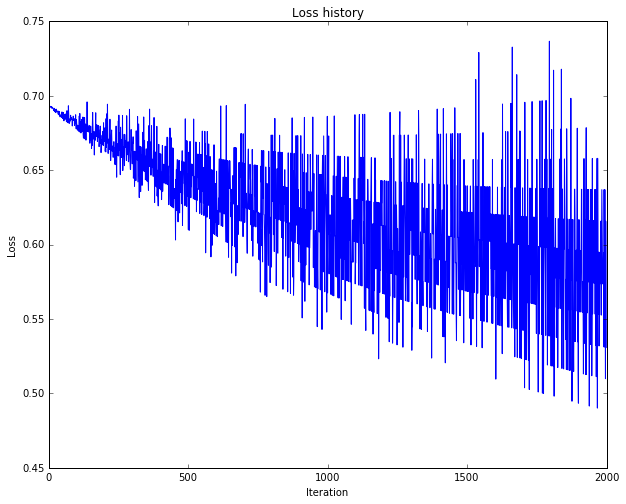

In [11]:
# Test
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### XOR
- 0, 0 = 0
- 0, 1 = 1
- 1, 0 = 1
- 1, 1 = 0

In [12]:
xor_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_y = [0, 1, 1, 0]

train_X, train_y, test_X, test_y = make_dataset(xor_X, xor_y)

(60000, 2) (60000,)
(10000, 2) (10000,)


In [13]:
print(train_X[:4], train_y[:4])

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]] [0 1 1 0]


In [14]:
layer1 = {'layer': (2, 5), 'act_F': lambda x: np.tanh(x) }
layer2 = {'layer': (5, 10), 'act_F': lambda x: np.tanh(x) }
layer3 = {'layer': (10, 5), 'act_F': lambda x: np.tanh(x) }
layer4 = {'layer': (5, 15), 'act_F': lambda x: np.tanh(x) }
layer5 = {'layer': (15, 10), 'act_F': lambda x: np.tanh(x) }
layer6 = {'layer': (10, 3), 'act_F': lambda x: np.tanh(x) }
layer7 = {'layer': (3, 2)} 
#output layer Softmax

nn = N_LayerNetwork([layer1, layer2, layer3, layer4, layer5, layer6, layer7])
nn.train(train_X, train_y, learning_rate=0.1, num_iters=3000, batch_size=20, verbose=True)

Epoch :  1  loss= 0.693147187849
Epoch :  51  loss= 0.693672463041
Epoch :  101  loss= 0.706007036672
Epoch :  151  loss= 0.68800048131
Epoch :  201  loss= 0.69317330955
Epoch :  251  loss= 0.690467160011
Epoch :  301  loss= 0.676306998167
Epoch :  351  loss= 0.69431843066
Epoch :  401  loss= 0.693244535122
Epoch :  451  loss= 0.693281065677
Epoch :  501  loss= 0.69857597876
Epoch :  551  loss= 0.698518141565
Epoch :  601  loss= 0.69177539652
Epoch :  651  loss= 0.724358464727
Epoch :  701  loss= 0.693853541223
Epoch :  751  loss= 0.703715591573
Epoch :  801  loss= 0.696026999126
Epoch :  851  loss= 0.681972388254
Epoch :  901  loss= 0.708121194588
Epoch :  951  loss= 0.701109535348
Epoch :  1001  loss= 0.688962474862
Epoch :  1051  loss= 0.691845843639
Epoch :  1101  loss= 0.694755319536
Epoch :  1151  loss= 0.693881242593
Epoch :  1201  loss= 0.693260865875
Epoch :  1251  loss= 0.696725365704
Epoch :  1301  loss= 0.693287587966
Epoch :  1351  loss= 0.694321232379
Epoch :  1401  loss=

Accuracy : 50.16%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


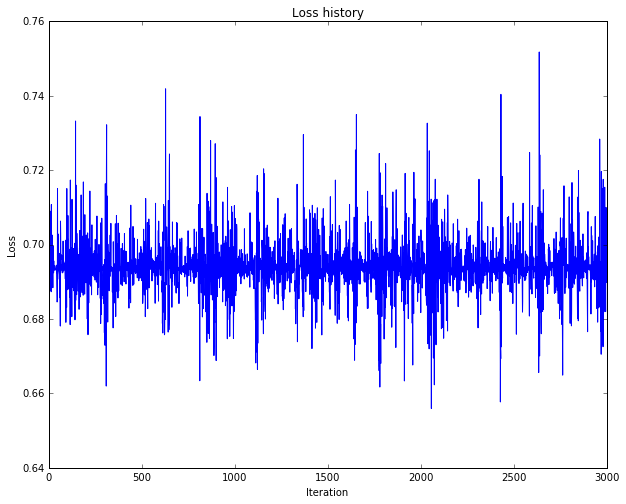

In [15]:
# Accuracy
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()